<a href="https://colab.research.google.com/github/Faareh-Ahmed/Download_Satellite_Imagery/blob/main/SentinelSingleImagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sentinelhub


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.8 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=83a730c7de45cd79b37a64968a7a4bca221d63c999960378abe8efe07c1b7746
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:

CLIENT_ID = 'b88bf46a-f979-4fd1-90d2-9f182a9fefdb'
CLIENT_SECRET = 'eeNwFVeuG4CQwaKhkyhyijijWKuRlqog'

In [ ]:
from sentinelhub import SHConfig

config = SHConfig()

config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET

if not config.sh_client_id or not config.sh_client_secret:
  print('Please provide credentials to use Process API.')

In [ ]:
from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)


In [ ]:

coords = (73.027177, 33.685496, 73.083129, 33.731193)

resolution = 10

bbox = BBox(bbox=coords, crs=CRS.WGS84)
image_size = bbox_to_dimensions(bbox, resolution=resolution)

print(f'Image shape at {resolution} m resolution: {image_size}')

Image shape at 10 m resolution: (528, 497)


In [ ]:
evalscript = """
//VERSION=3

function setup() {
  return {
    input: ["B02", "B03", "B04"],
    output: { bands: 3 }
  };
}

function evaluatePixel(sample) {
  return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
}
"""

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=('2020-11-11', '2024-10-15'),
            other_args={"dataFilter": {"mosaickingOrder": "leastCC"}}
        ),
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF),
    ],
    bbox=bbox,
    size=image_size,
    config=config
)

response = request.get_data()


In [ ]:

# How to Plot the Image

from typing import Any, Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np


def plot_image(
    image: np.ndarray, factor: float = 1.0, clip_range: Optional[Tuple[float, float]] = None, **kwargs: Any
) -> None:
    """Utility function for plotting RGB images."""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
response[0].shape


(497, 528, 3)

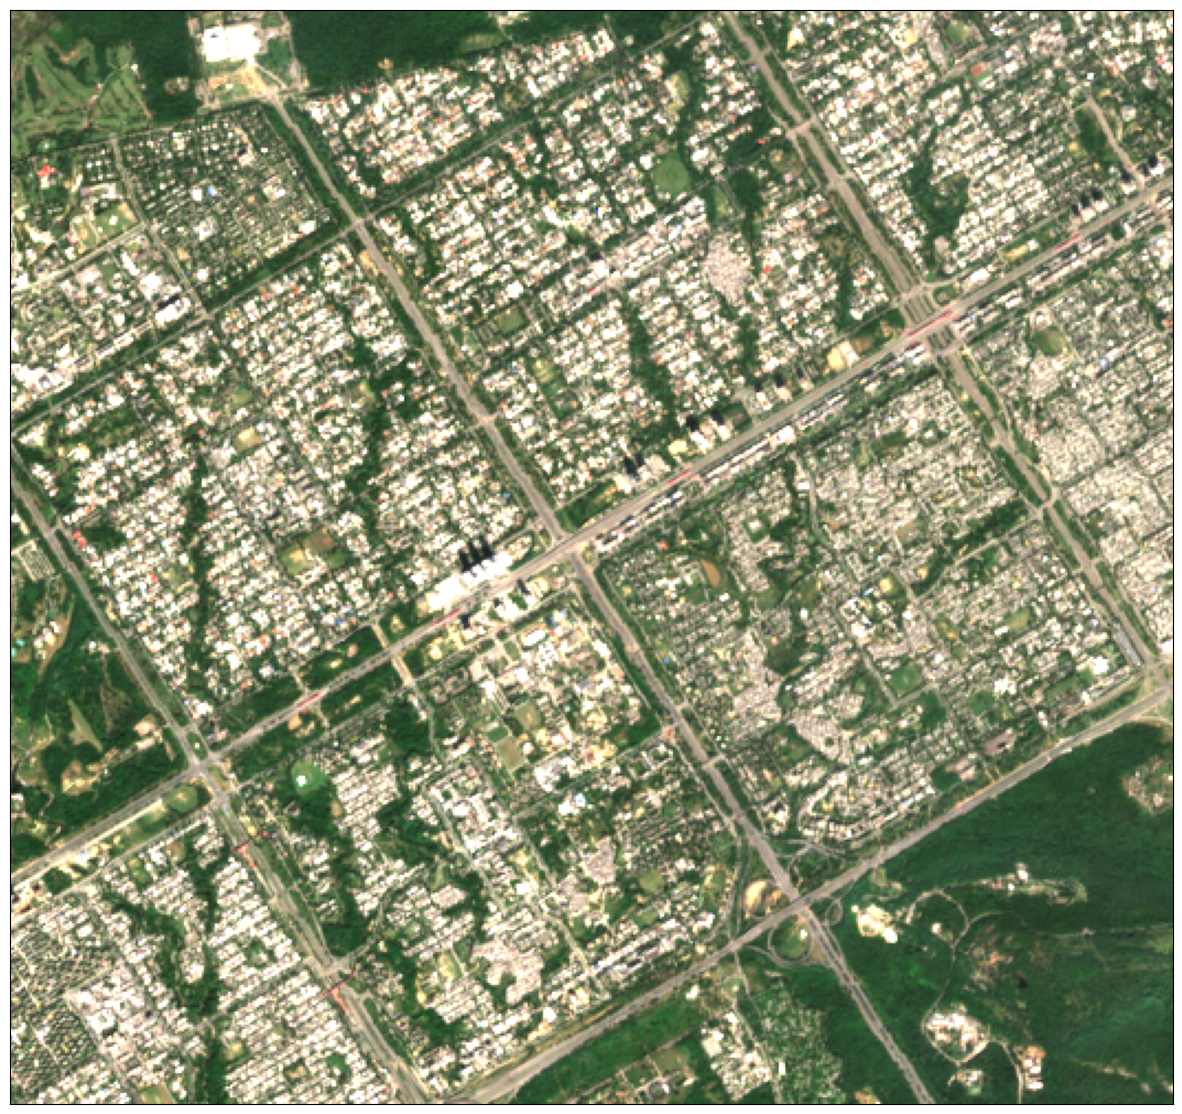

In [ ]:
plot_image(response[0], 2.5/255, (0,1))
